# Практическая работа №5: Исследование результатов фильтрации дискретного сигнала с помощью нерекурсивных фильтров, построенных на основе полиномиальных приближений

Выполнили студенты гр. 0382 Крючков Артем и Афанасьев Назар. Вариант №10.

## Цель работы

Получение практических навыков выполнения фильтрации дискретных последовательностей с помощью полиномиальных фильтров, а также анализа получаемых результатов с помощью дискретного преобразования Фурье (ДПФ).

## Основные теоретические положения

**Аналоговый сигнал** — это сигнал, непрерывный по времени.

**Дискретный сигнал** — это сигнал, дискретный по времени и непрерывный по состоянию.

Представим дискретный сигнал в виде:

$$s(t)=\sum_{k=-\infty}^{\infty} x_k\delta(t-k)$$

Тогда **спектр дискретного сигнала**:

$$S(\omega)=\sum_{k=-\infty}^{\infty} x_ke^{-i\omega k}$$

Пусть последовательность отсчётов $\{x_k\}$ является периодической с периодом $N$.

**Дискретное преобразование Фурье (ДПФ)**:

$$X(n)=\sum_{k=0}^{N-1}x_ke^{-i\frac{2 \pi n}{N}k}, \quad n=0,1,2,...,N-1$$

**Обратное дискретное преобразование Фурье (ОДПФ)**:

$$x_k=\frac1n \sum_{n=0}^{N-1} X(n)e^{i\frac{2 \pi k}{N}n}, \quad k=0,1,2,...,N-1$$

**Сглаживание входного сигнала** — приближение (в смысле МНК) сигнала $s(t)$ функцией $y(t)$ по $N$ точкам:

$$\sum_{k=0}^{N}(s_k-y_k)^2 \Rightarrow min$$

## Постановка задачи

Для заданного дискретного сигнала применить фильтры, основанные на сглаживании полиномами. Полученные результаты содержательно проинтерпретировать.

## Выполнение работы

Импорт необходимых модулей и определение констант

In [76]:
import numpy as np
import matplotlib.pyplot as plt

### Задание 1

Был сформирован дискретный сигнал из 32 отсчётов ($N=31$) посредством дискретизации с шагом $T=1$ непрерывного сигнала, представляющего собой линейную комбинацию косинусоид вида $A_k\cos (\omega_kt+\varphi_k)$.

- Частоты гармоник $\omega_k$ представляют собой числа со значениями от 0 до $\pi$ с шагом $\Delta \omega = 0.1$
- Амплитуды гармоник $A_k$ представляют собой нормализованные случайные (равномерно распределённые) целые числа от 1 до 11
- Начальные фазы $\varphi_k$ представляют собой случайные числа в промежутке от 0 до 0.5





In [77]:
T = 1
N = 31
n = np.arange(0, N + 1, T)

A_k = np.random.randint(1, 12, size=11)
A_k = A_k / np.sum(A_k)
phi_k = np.random.uniform(0, 0.5, size=11)
omega_k = np.arange(0, 1.1, 0.1) * np.pi

t = np.linspace(0, N, 1000)
analog = np.sum([A_k[i] * np.cos(omega_k[i]*t + phi_k[i]) for i in range(11)], axis=0)
discrete = np.sum([A_k[i] * np.cos(omega_k[i]*n + phi_k[i]) for i in range(11)], axis=0)

### Задание 2

Были визуализированы исходный аналоговый и дискретизированный сигналы.

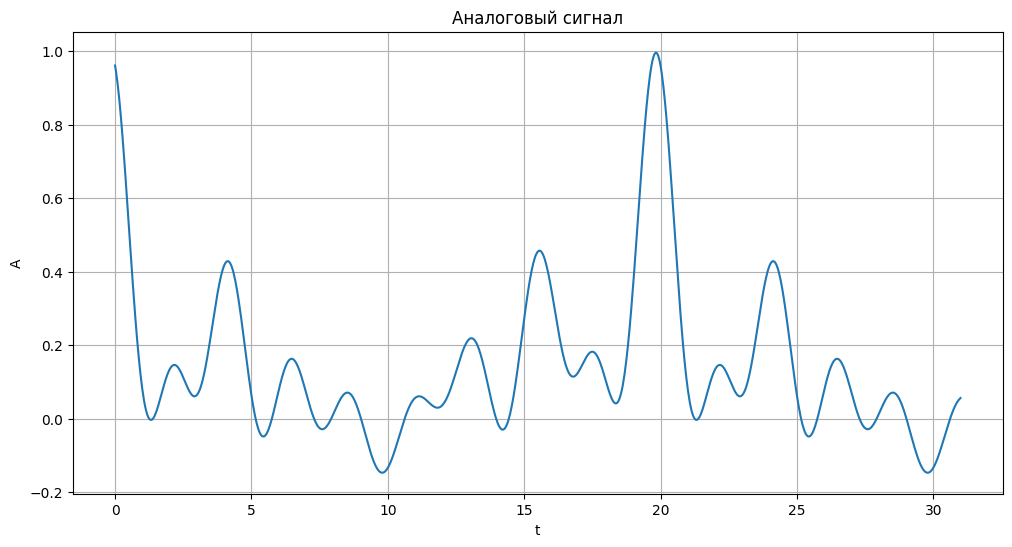

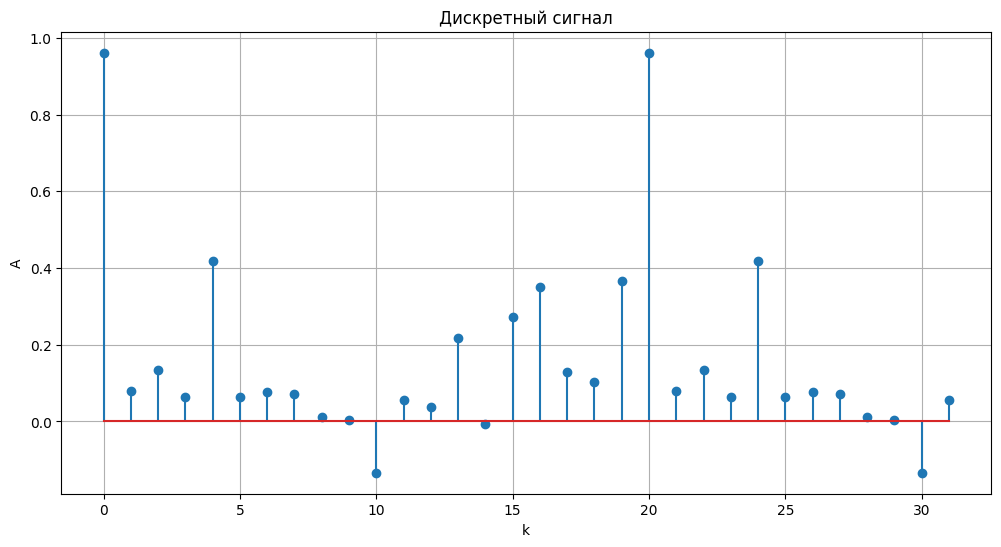

In [78]:
plt.figure(figsize=(12, 6))
plt.plot(t, analog)
plt.title('Аналоговый сигнал')
plt.xlabel('t')
plt.ylabel('A')
plt.grid(True)
plt.show()

plt.figure(figsize=(12, 6))
plt.stem(n, discrete, use_line_collection=True)
plt.title('Дискретный сигнал')
plt.xlabel('k')
plt.ylabel('A')
plt.grid(True)
plt.show()

### Задание 3

С помощью дискретного преобразования Фурье были найдены дискретные отсчеты спектра дискретного сигнала:

$$
S(\omega)=\sum_{k=-\infty}^{\infty} x_ke^{-i\omega k}
$$

$$
X(n)=\sum_{k=0}^{N-1} x_k e^{-i \frac{2 \pi n}{N} k}, \quad n=0,1,2, \ldots, N-1
$$


$$
\Rightarrow X(n)=S(\frac{2\pi n}{N})=S(\omega\frac{ n}{N})=S(2\pi f\frac{ n}{N}), \quad f\frac{ n}{N} \in [0; \frac{N-1}{N}]
$$

Полученные значения были визуализированы на графике.


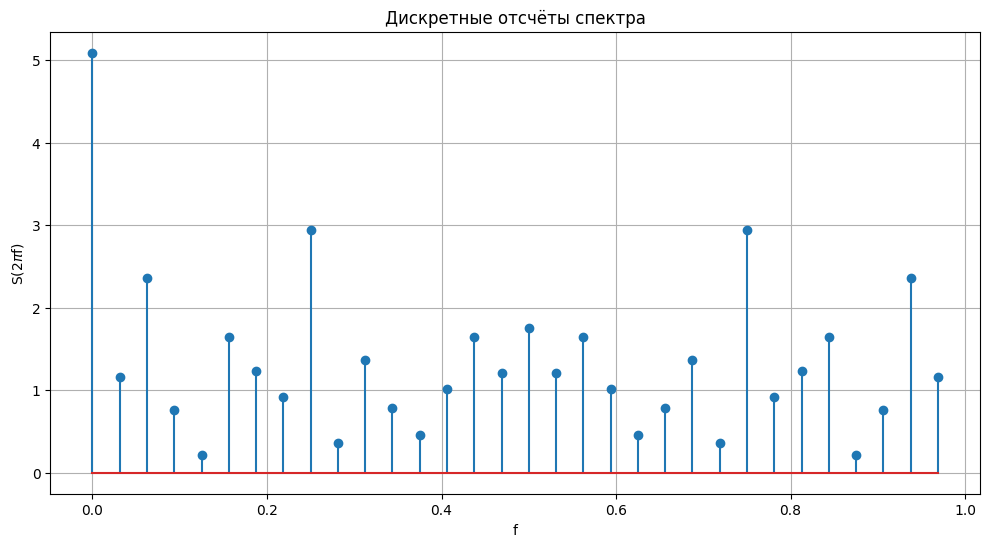

In [79]:
def dft(x):
    N = len(x)
    n = np.arange(N)
    k = n.reshape((N, 1))
    e = np.exp(-2j * np.pi * k * n / N)
    return np.dot(e, x)

X_n = dft(discrete)
f = np.arange(N+1)/(N+1)

plt.figure(figsize=(12, 6))
plt.stem(f, np.abs(X_n), use_line_collection=True)

def showSpectrum(legend=True):
    plt.title('Дискретные отсчёты спектра')
    plt.xlabel('f')
    plt.ylabel(r'S(2$\pi$f)')
    plt.grid(True)
    if legend: plt.legend()
    plt.show()
showSpectrum(False)

### Задание 4


Для дискретного сигнала было применено линейное сглаживание по 5-ти и 9-ти точкам.

Формула сглаживания прямой линией по $2m+1$ точкам выглядит следующим образом: 

$y_n = \frac1{2m+1} \sum_{k=n-m}^{k=n+m}s_k$

- Для 5-ти точек: $y_n = \frac15 \sum_{k=n-2}^{k=n+2}s_k$

- Для 9-ти точек: $y_n = \frac19 \sum_{k=n-4}^{k=n+4}s_k$

Значение передаточной функции фильтра выглядит следующим образом:

$H(\omega, m)=\frac1{2m+1} \sum_{k=n-m}^{k=n+m}e^{i \omega k}=\frac{\sin(\frac{(2m+1)\omega}{2})}{(2m+1) \sin(\frac{\omega}{2})}$

- Для 5-ти точек: $H(\omega) = \frac{\sin(\frac{5\omega}{2})}{5 \sin(\frac{\omega}{2})}$

- Для 9-ти точек: $H(\omega) = \frac{\sin(\frac{9\omega}{2})}{9 \sin(\frac{\omega}{2})}$

In [80]:
def smooth_5(s):
    return np.convolve(s, np.ones(5)/5, mode='same')

def smooth_9(s):
    return np.convolve(s, np.ones(9)/9, mode='same')

smoothed_signal_5 = smooth_5(discrete)
smoothed_signal_9 = smooth_9(discrete)

### Задание 5

Были визуализированы полученные после фильтраций дискретные сигналы совместно с исходным дискретным сигналом.

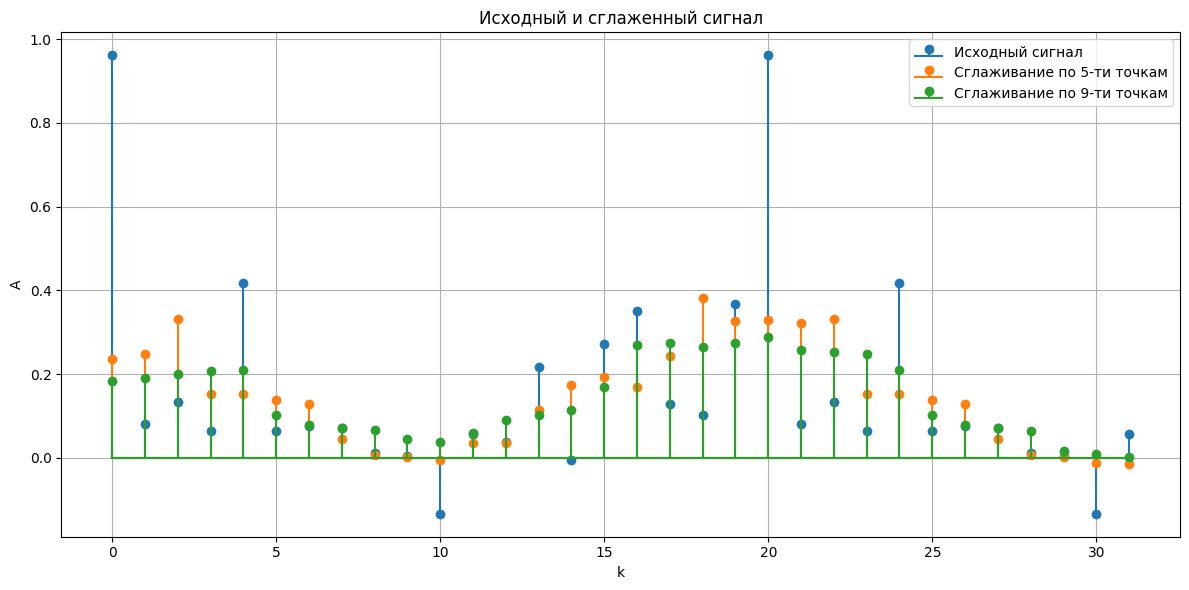

In [81]:
t = np.arange(N+1)

plt.figure(figsize=(12, 6))
plt.stem(t, discrete, linefmt='C0-', markerfmt='C0o', basefmt='C0-', use_line_collection=True, label='Исходный сигнал')
plt.stem(t, smoothed_signal_5, linefmt='C1-', markerfmt='C1o', basefmt='C1-', use_line_collection=True, label='Сглаживание по 5-ти точкам')
plt.stem(t, smoothed_signal_9, linefmt='C2-', markerfmt='C2o', basefmt='C2-', use_line_collection=True, label='Сглаживание по 9-ти точкам')

def showSignal():
    plt.title('Исходный и сглаженный сигнал')
    plt.xlabel('k')
    plt.ylabel('A')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()
showSignal()

### Задание 6

С помощью ДПФ были найдены дискретные отсчёты спектра дискретного сигнала после его фильтрации и визуализированы совместно с отсчётами спектра исходного дискретного сигнала.

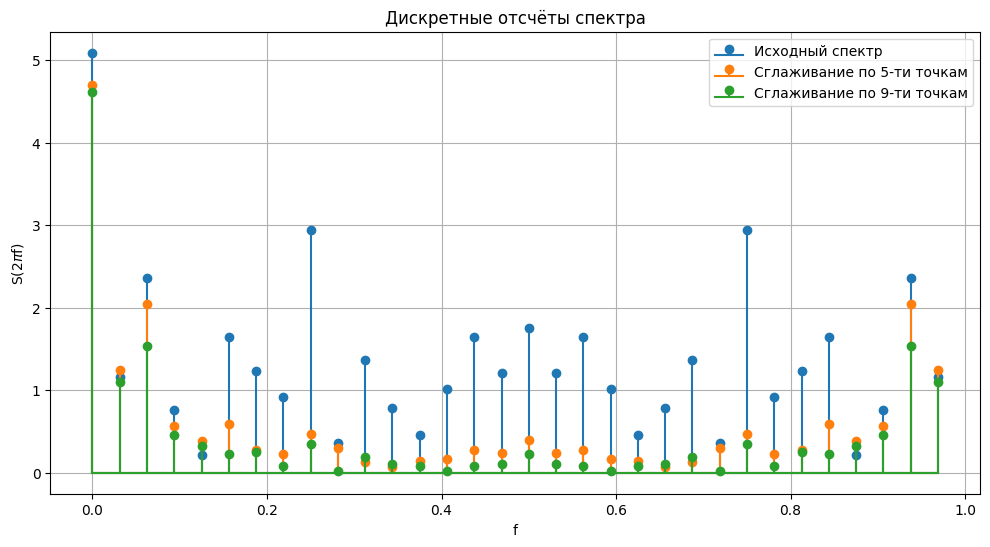

In [82]:
spectrum_original = dft(discrete)
spectrum_filtered_5 = dft(smoothed_signal_5)
spectrum_filtered_9 = dft(smoothed_signal_9)

plt.figure(figsize=(12, 6))
plt.stem(f, np.abs(spectrum_original), linefmt='C0-', markerfmt='C0o', basefmt='C0-', use_line_collection=True, label='Исходный спектр')
plt.stem(f, np.abs(spectrum_filtered_5), linefmt='C1-', markerfmt='C1o', basefmt='C1-', use_line_collection=True, label='Сглаживание по 5-ти точкам')
plt.stem(f, np.abs(spectrum_filtered_9), linefmt='C2-', markerfmt='C2o', basefmt='C2-', use_line_collection=True, label='Сглаживание по 9-ти точкам')
showSpectrum()

### Задание 7

Как можно видеть по графикам, изменения значений дискретных отсчётов спектра согласуются со значениями передаточных функций:

- В окрестностях нулевой частоты существует полоса пропускания (так как сигнал непостоянный величина падавления не будет нулевой);
- Высокие частоты (в окрестностях $f=0.5$) сильно подавляются;
- Чем выше количество точек, тем меньше полоса пропускания и тем больше подавление высоких частот.

### Задание 8

#### Сглаживание полиномом 2-ой степени по 5 и 9 узлам

##### пункт 4

Для дискретного сигнала было применено cглаживания полиномом 2-ой степени по 5 и 9 узлам.

Формула cглаживания полиномом 2-ой степени по $2m+1$ точкам выглядит следующим образом: 

$y_n = \frac1a \sum_{k=n-m}^{k=n+m}c_ks_k$

- Для 5-ти точек: $\quad a=35 \qquad c=[-3, 12, 17, 12, -3]$

- Для 9-ти точек: $\quad a=231 \qquad c=[-21, 14, 39, 54, 59, 54, 39, 14, -21]$

Значение передаточной функции фильтра выглядит следующим образом:

$H(\omega) = \frac1a \sum_{k=0}^{k=m}d_k \cos(k\omega)$

- Для 5-ти точек: $\quad a=35 \qquad d=[17, 24, -6]$

- Для 9-ти точек: $\quad a=231 \qquad d=[59, 108, 78, 28, -42]$

In [83]:
def smooth_5(s):
    weights = np.array([-3, 12, 17, 12, -3]) / 35
    return np.convolve(s, weights, mode='same')

def smooth_9(s):
    weights = np.array([-21, 14, 39, 54, 59, 54, 39, 14, -21]) / 231
    return np.convolve(s, weights, mode='same')

smoothed_signal_5 = smooth_5(discrete)
smoothed_signal_9 = smooth_9(discrete)

##### пункт 5

Были визуализированы полученные после фильтраций дискретные сигналы совместно с исходным дискретным сигналом.

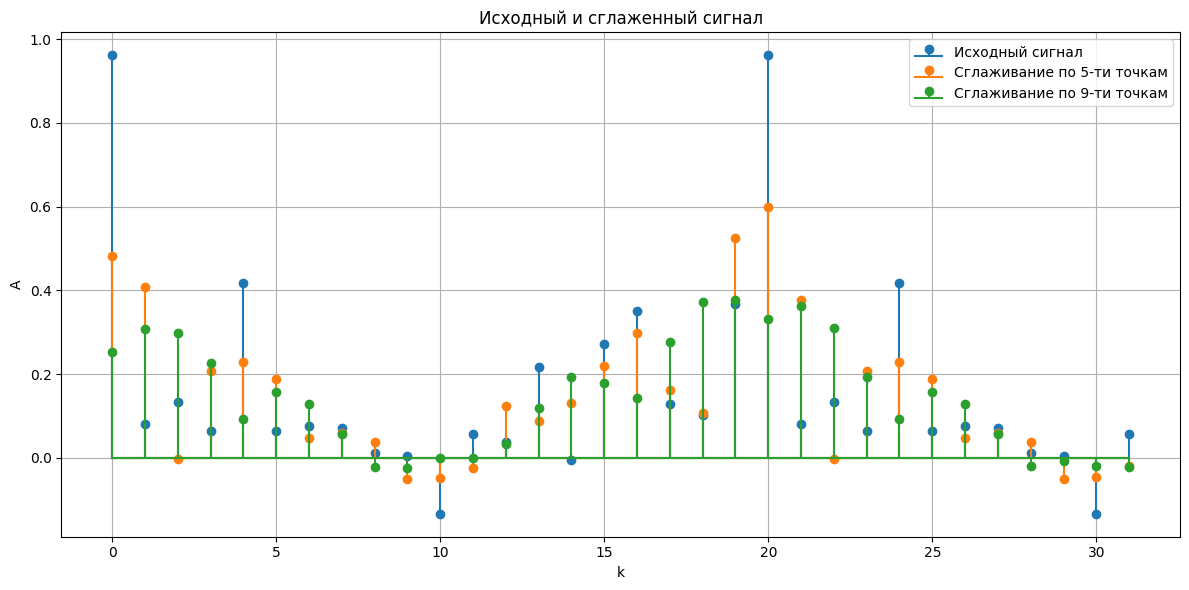

In [84]:
plt.figure(figsize=(12, 6))
plt.stem(t, discrete, linefmt='C0-', markerfmt='C0o', basefmt='C0-', use_line_collection=True, label='Исходный сигнал')
plt.stem(t, smoothed_signal_5, linefmt='C1-', markerfmt='C1o', basefmt='C1-', use_line_collection=True, label='Сглаживание по 5-ти точкам')
plt.stem(t, smoothed_signal_9, linefmt='C2-', markerfmt='C2o', basefmt='C2-', use_line_collection=True, label='Сглаживание по 9-ти точкам')
showSignal()

##### пункт 6

С помощью ДПФ были найдены дискретные отсчёты спектра дискретного сигнала после его фильтрации и визуализированы совместно с отсчётами спектра исходного дискретного сигнала.

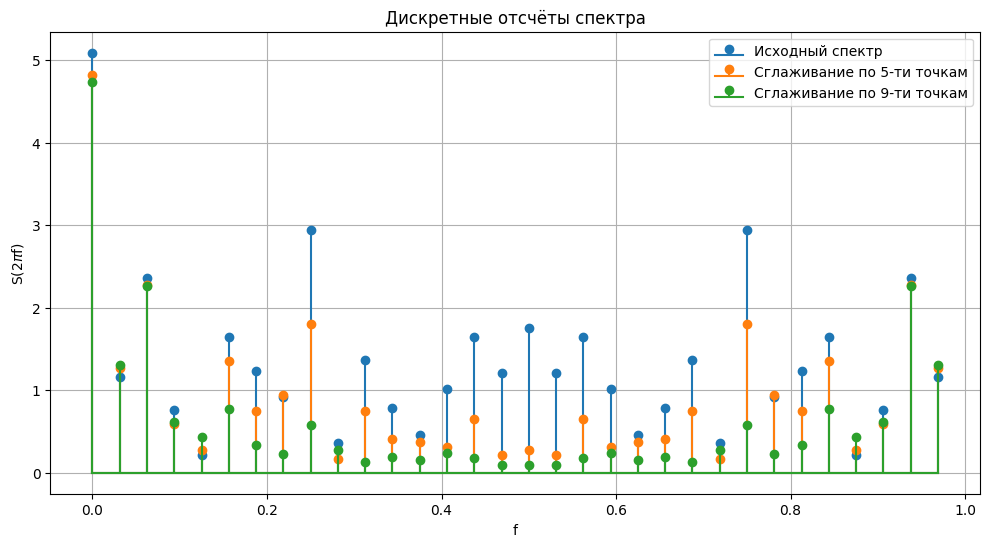

In [85]:
spectrum_original = dft(discrete)
spectrum_filtered_5 = dft(smoothed_signal_5)
spectrum_filtered_9 = dft(smoothed_signal_9)

plt.figure(figsize=(12, 6))
plt.stem(f, np.abs(spectrum_original), linefmt='C0-', markerfmt='C0o', basefmt='C0-', use_line_collection=True, label='Исходный спектр')
plt.stem(f, np.abs(spectrum_filtered_5), linefmt='C1-', markerfmt='C1o', basefmt='C1-', use_line_collection=True, label='Сглаживание по 5-ти точкам')
plt.stem(f, np.abs(spectrum_filtered_9), linefmt='C2-', markerfmt='C2o', basefmt='C2-', use_line_collection=True, label='Сглаживание по 9-ти точкам')
showSpectrum()

##### пункт 7

Как можно видеть по графикам, изменения значений дискретных отсчётов спектра согласуются со значениями передаточных функций:

- В окрестностях нулевой частоты существует полоса пропускания (так как сигнал непостоянный величина падавления не будет нулевой);
- Высокие частоты (в окрестностях $f=0.5$) сильно подавляются;
- Чем выше количество точек, тем меньше полоса пропускания и тем больше подавление высоких частот.

#### Сглаживание полиномом 4-ой степени по 7 и 11 узлам

##### пункт 4

Для дискретного сигнала было применено cглаживания полиномом 4-ой степени по 7 и 11 узлам.

Формула cглаживания полиномом 4-ой степени по $2m+1$ точкам выглядит следующим образом: 

$y_n = \frac1a \sum_{k=n-m}^{k=n+m}c_ks_k$

- Для 7-ти точек: $\quad a=231 \qquad c=[5, -30, 75, 131, 75, -30, 5]$

- Для 11-ти точек: $\quad a=429 \qquad c=[18, -45, -10, 60, 120, 143, 120, 60, -10, -45, 18]$

Значение передаточной функции фильтра выглядит следующим образом:

$H(\omega) = \frac1a \sum_{k=0}^{k=m}d_k \cos(k\omega)$

- Для 7-ти точек: $\quad a=231 \qquad d=[131, 150, -60, 10]$

- Для 11-ти точек: $\quad a=429 \qquad d=[143, 240, 120, -20, -90, 36]$

In [86]:
def smooth_7(s):
    weights = np.array([5, -30, 75, 131, 75, -30, 5]) / 231
    return np.convolve(s, weights, mode='same')

def smooth_11(s):
    weights = np.array([18, -45, -10, 60, 120, 143, 120, 60, -10, -45, 18]) / 429
    return np.convolve(s, weights, mode='same')

smoothed_signal_7 = smooth_7(discrete)
smoothed_signal_11 = smooth_11(discrete)

##### пункт 5

Были визуализированы полученные после фильтраций дискретные сигналы совместно с исходным дискретным сигналом.

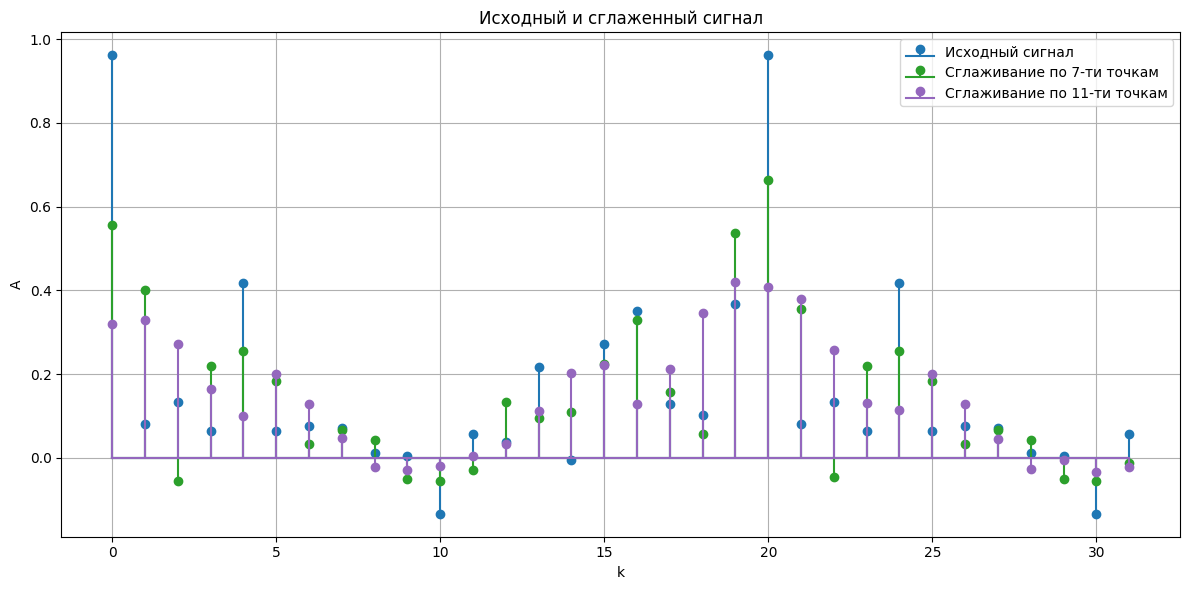

In [87]:
plt.figure(figsize=(12, 6))
plt.stem(t, discrete, linefmt='C0-', markerfmt='C0o', basefmt='C0-', use_line_collection=True, label='Исходный сигнал')
plt.stem(t, smoothed_signal_7, linefmt='C2-', markerfmt='C2o', basefmt='C2-', use_line_collection=True, label='Сглаживание по 7-ти точкам')
plt.stem(t, smoothed_signal_11, linefmt='C4-', markerfmt='C4o', basefmt='C4-', use_line_collection=True, label='Сглаживание по 11-ти точкам')
showSignal()

##### пункт 6

С помощью ДПФ были найдены дискретные отсчёты спектра дискретного сигнала после его фильтрации и визуализированы совместно с отсчётами спектра исходного дискретного сигнала.

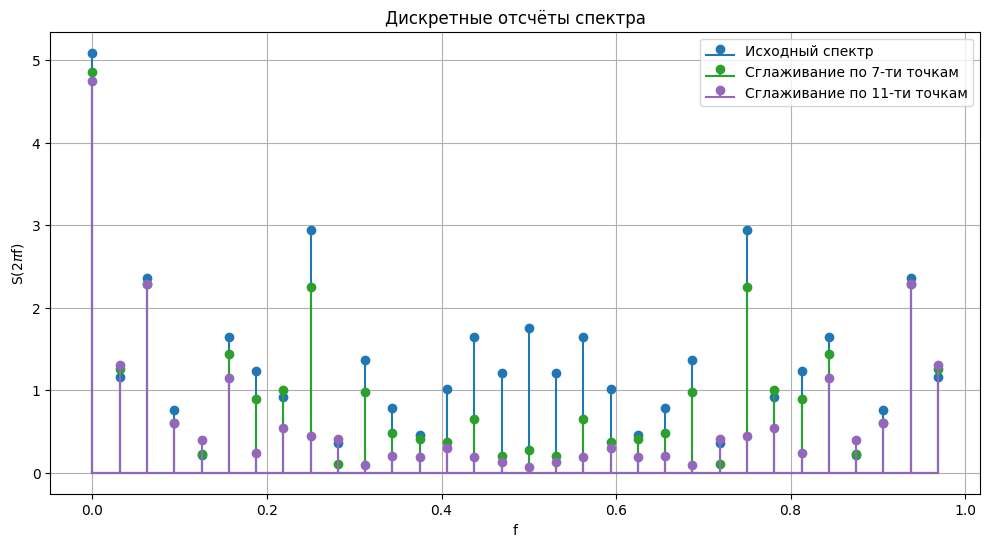

In [88]:
spectrum_original = np.fft.fft(discrete)
spectrum_filtered_7 = np.fft.fft(smoothed_signal_7)
spectrum_filtered_11 = np.fft.fft(smoothed_signal_11)

plt.figure(figsize=(12, 6))
plt.stem(f, np.abs(spectrum_original), linefmt='C0-', markerfmt='C0o', basefmt='C0-', use_line_collection=True, label='Исходный спектр')
plt.stem(f, np.abs(spectrum_filtered_7), linefmt='C2-', markerfmt='C2o', basefmt='C2-', use_line_collection=True, label='Сглаживание по 7-ти точкам')
plt.stem(f, np.abs(spectrum_filtered_11), linefmt='C4-', markerfmt='C4o', basefmt='C4-', use_line_collection=True, label='Сглаживание по 11-ти точкам')
showSpectrum()

##### пункт 7

Как можно видеть по графикам, изменения значений дискретных отсчётов спектра согласуются со значениями передаточных функций:

- В окрестностях нулевой частоты существует полоса пропускания (так как сигнал непостоянный величина падавления не будет нулевой);
- Высокие частоты (в окрестностях $f=0.5$) сильно подавляются;
- Чем выше количество точек, тем меньше полоса пропускания и тем больше подавление высоких частот;
- При увеличении степени полинома, по которому происходит сглаживание, увеличивается порядок касания у нулевой частоты.

## Выводы

В результате выполнения практической работы был получен опыт выполнения фильтрации дискретных последовательностей с помощью полиномиальных фильтров, а также анализа получаемых результатов с помощью дискретного преобразования Фурье (ДПФ). Исследуемый дискретный сигнал был сформирован посредством дискретизации непрерывного сигнала, представляющего собой линейную комбинацию гармонических функций. Для полученного сигнала были найдены дискретные отсчёты спектра при помощи дискретного преобразования Фурье. Этот спектр был сравнён со спректрами модифицированных сигналов: при сглаживании исходного сигнала линией и полиномами второй и четвёртой степени с разным количеством точек. Изменения в значениях отсчётов спектров были сопоставлены с характером передаточных функций соответсвующих фильтров. Были выявлены схожие зависимости от степени сглаживающего полинома и количества используемых точек.